- Albert Molano   - 201713848
- Luisa Rodríguez - 201716897
- Nicolas Segura  - 201716989

## 1. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1061]:
# Declaración de la semilla
seed = 161
# Librerías para manejo de datos
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

import numpy as np
np.random.seed(seed)


# Para preparar los datos
# ------------------------
from sklearn import tree as tr
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
# Para crear el arbol de decisión 
from sklearn.tree import DecisionTreeClassifier 
# Para usar KNN como clasificador
from sklearn.neighbors import KNeighborsClassifier
# Para realizar la separación del conjunto de aprendizaje en entrenamiento y test.
from sklearn.model_selection import train_test_split
# Para evaluar el modelo
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import plot_confusion_matrix
# Para búsqueda de hiperparámetros
from sklearn.model_selection import GridSearchCV
# Para la validación cruzada
from sklearn.model_selection import KFold 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#Librerías para la visualización
# -------------------------
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns 



## 2. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv (archivo separado por comas).

In [1062]:
# Se cargan los datos. 
diagnostics=pd.read_csv('datos/SaludAlpes_diagnosticos_dataset.csv', sep=';', encoding = 'utf-8')

In [1063]:
# Cantidad de datos y número de variables
diagnostics.shape

(767, 11)

In [1064]:
# Mostrar los datos
diagnostics.head()

,Hair_color,Pregnancies,Glucose,City,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,Red,6,148,New York,72,35,0,336,627,50,1
1,Black,1,85,New York,66,29,0,266,351,31,0
2,Red,8,183,New York,64,0,0,233,672,32,1
3,Black,1,89,New York,66,23,94,281,167,21,0
4,Black,0,137,New York,40,35,168,431,2288,33,1


In [1065]:
# Podemos ver los tipos de todas la variables.
diagnostics.dtypes

Hair_color                  object
Pregnancies                  int64
Glucose                      int64
City                        object
BloodPressure                int64
SkinThickness                int64
Insulin                      int64
BMI                          int64
DiabetesPedigreeFunction     int64
Age                          int64
Outcome                      int64
dtype: object

In [1066]:
# Y hacer una descripción de los datos
diagnostics.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,3.839635,120.921773,69.096480,20.563233,79.903520,289.670143,432.395046,38.006519,0.349413
std,3.368429,31.984561,19.366833,15.945349,115.283105,116.780873,336.144934,117.902397,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,251.500000,205.500000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,32.000000,309.000000,337.000000,29.000000,0.000000
75%,6.000000,140.500000,80.000000,32.000000,127.500000,359.000000,592.000000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2329.000000,3256.000000,1.000000


In [1067]:

# Se observa que hay ausencias, en particular en la variable "decibel_range". Veamos cuantas, para todas las variables:
diagnostics[(diagnostics==0)].count()

Hair_color                    0
Pregnancies                 111
Glucose                       5
City                          0
BloodPressure                35
SkinThickness               226
Insulin                     373
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     499
dtype: int64

## 3. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados el tratamiento de ausencias y registros duplicados.

In [1068]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
diagnostics_t = diagnostics.copy()
# Primero eliminaremos aquellas variables con muchas ausencias.
diagnostics_t = diagnostics_t.drop(['Hair_color', 'City'], axis=1)

In [1069]:
# Eliminación registros con ausencias
indices = diagnostics_t[(diagnostics_t['Insulin'] == 0) | (diagnostics_t['BMI'] == 0) | (diagnostics_t['Glucose'] == 0) | (diagnostics_t['SkinThickness'] == 0) ].index
diagnostics_t.drop(indices, inplace=True)


In [1070]:
diagnostics_t.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,308.017857,480.663265,39.117347,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,105.863577,340.370137,163.210975,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,24.000000,4.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,262.750000,245.750000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,328.000000,422.000000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,368.250000,667.750000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,671.000000,2329.000000,3256.000000,1.000000


In [1071]:
diagnostics_t.shape

(392, 9)

In [1072]:
diagnostics_t.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,308.017857,480.663265,39.117347,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,105.863577,340.370137,163.210975,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,24.000000,4.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,262.750000,245.750000,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,328.000000,422.000000,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,368.250000,667.750000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,671.000000,2329.000000,3256.000000,1.000000


In [1073]:
# Cantidad de datos y número de variables
diagnostics_t.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,281,167,21,0
4,0,137,40,35,168,431,2288,33,1
6,3,78,50,32,88,31,248,26,1
8,2,197,70,45,543,305,158,53,1
13,1,189,60,23,846,301,398,59,1


In [1074]:
# Podemos ver los estadísticos de la variable "popularity"
pd.value_counts(diagnostics_t['Outcome'])

0    262
1    130
Name: Outcome, dtype: int64

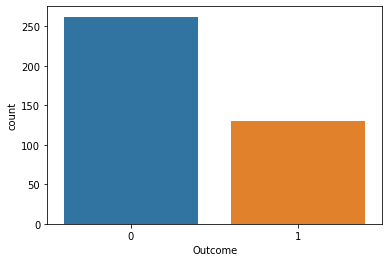

In [1075]:
ax = sns.countplot(x='Outcome', data=diagnostics_t)

Un aspecto muy importante para tener en cuenta son los requerimientos de entrada de los algoritmos de aprendizaje implementados en las librerías utilizadas. En particular, scikit-learn requiere que todos los atributos sean numéricos y que la variable objetivo, en una tarea de clasificación, esté codificada con números.

In [1076]:
# Vamos a seleccionar de nuestro conjunto solo los atributos numéricos.
number_cols = diagnostics_t.dtypes[(diagnostics_t.dtypes == np.int64) | (diagnostics_t.dtypes == np.float64)].index 
number_cols = diagnostics_t.select_dtypes(include = ['int64','float']).columns
number_cols

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [1077]:
diagnostics_m = diagnostics_t[number_cols]

In [1078]:
# Podemos ver como quedaron los datos
diagnostics_m.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,281,167,21,0
4,0,137,40,35,168,431,2288,33,1
6,3,78,50,32,88,31,248,26,1
8,2,197,70,45,543,305,158,53,1
13,1,189,60,23,846,301,398,59,1


In [1079]:
# Revisión del total de registros
diagnostics_m.shape

(392, 9)

## 4. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [1080]:
scaler = StandardScaler()
normalized_diag = scaler.fit_transform(diagnostics_m)
normalized_diag = pd.DataFrame(data=diagnostics_m,columns=diagnostics_m.columns)


In [1081]:
# Se selecciona la variable objetivo, en este caso "Popularity_label".
Y = normalized_diag['Outcome']
# Del conjunto de datos se elimina la variable "Popularity_label"
X = normalized_diag.drop(['Outcome'], axis=1)

In [1082]:
# Dividir los datos en entrenamiento y test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)

#### 4.1  KNN

In [1083]:
neigh = KNeighborsClassifier(n_neighbors=3, metric = 'minkowski', p = 2)
neigh = neigh.fit(X_train, Y_train)

In [1084]:
y_pred = neigh.predict(X_test)

In [1085]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[44,  7],
       [13, 15]], dtype=int64)

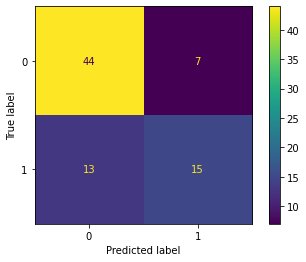

In [1086]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(neigh, X_test, Y_test)  
plt.show()

In [1087]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81        51
           1       0.68      0.54      0.60        28

    accuracy                           0.75        79
   macro avg       0.73      0.70      0.71        79
weighted avg       0.74      0.75      0.74        79



### 4.2 Árbol de decisión

 4.2 Modelo de árbol de decisión

In [1088]:
# Crear el objeto de arbol de decisión. Utilicemos como criterio de pureza la entropía.
tree = DecisionTreeClassifier(criterion='entropy', random_state=seed, max_depth = 8, min_samples_split=2)

In [1089]:
# Entrenar el modelo de arbol de decisión con los datos de entrenamiento
tree = tree.fit(X_train,Y_train)

Para determinar el rendimiento del modelo podemos en primer lugar, generar la matriz de confusión.

In [1090]:
# Determinamos las predicciones del modelo sobre el conjunto test.
y_pred = tree.predict(X_test)

In [1091]:
# Se genera la matriz de confusión
confusion_matrix(Y_test, y_pred)

array([[39, 12],
       [12, 16]], dtype=int64)

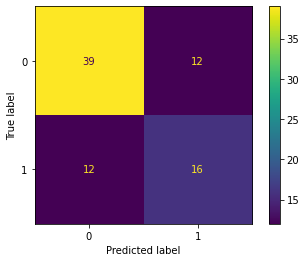

In [1092]:
# Se puede visualizar la matriz de confusión
plot_confusion_matrix(tree, X_test, Y_test)  
plt.show()  

In [1093]:
print('Exactitud: %.2f' % accuracy_score(Y_test, y_pred))
print("Recall: {}".format(recall_score(Y_test,y_pred)))
print("Precisión: {}".format(precision_score(Y_test,y_pred)))
print("Puntuación F1: {}".format(f1_score(Y_test,y_pred)))

Exactitud: 0.70
Recall: 0.5714285714285714
Precisión: 0.5714285714285714
Puntuación F1: 0.5714285714285714


Para tener una panorama completo podemos generar un reporte.

In [1094]:
# Mostrar reporte de clasificación
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        51
           1       0.57      0.57      0.57        28

    accuracy                           0.70        79
   macro avg       0.67      0.67      0.67        79
weighted avg       0.70      0.70      0.70        79



### 4.3 Regresion Lineal

In [1095]:
LinearModel = LinearRegression().fit(X_train, Y_train)
list(zip(X_train, LinearModel.coef_))

[('Pregnancies', 0.02301419362343993),
 ('Glucose', 0.006520994369351876),
 ('BloodPressure', 0.0006664073688395745),
 ('SkinThickness', 0.007806601052344215),
 ('Insulin', -0.00012669090375803764),
 ('BMI', -0.00015588100192097983),
 ('DiabetesPedigreeFunction', 0.00020472454679660353),
 ('Age', -4.373122587046749e-06)]

In [1096]:
#Este método nos permite predecir las etiquetas de los valores de los datos sobre la base del modelo entrenado.
y_prediction_lineal = LinearModel.predict(X_test)
y_prediction_lineal

array([ 0.22927102,  0.88653149,  0.56768208, -0.07598307,  0.42339005,
        0.18288551,  0.00752645,  0.64966128, -0.14255743,  0.05395887,
        0.47221195,  0.0607339 ,  0.02624723,  0.7336205 ,  0.79719778,
        0.08697518, -0.04190444,  0.0838193 ,  0.27994637,  0.15901323,
        0.37915699,  0.02673203,  0.41938999,  0.28029967, -0.04607625,
        0.18792721,  0.00454998,  0.25031669,  0.75251722,  0.74939649,
        0.15500306,  0.8906341 ,  0.11946839,  0.20991144,  0.66626407,
        0.55646602, -0.02799665,  0.12390789,  0.31690324,  0.10578365,
        0.72436733,  0.19347068,  0.08665374,  0.79780011,  0.62201482,
       -0.10973   ,  0.09453429,  0.45103412,  0.34560563,  0.62570417,
        0.32689964,  0.42482632,  0.63076683,  0.42233055,  0.03593057,
        0.59768688,  0.26224701,  0.58117967,  0.28070298,  0.28195736,
        0.13721663,  0.82126234,  0.81904896,  0.37103641,  0.33319589,
        0.44102166,  0.27526125,  0.86180707,  0.53391838,  0.09

In [1097]:
# Replace all values in y_prediction_poly with 0 or 1 if they are above or below 0.5.
y_prediction_lineal[y_prediction_lineal >= 0.5] = 1
y_prediction_lineal[y_prediction_lineal < 0.5] = 0


In [1098]:
confusion_matrix(Y_test, y_prediction_lineal)

array([[44,  7],
       [11, 17]], dtype=int64)

In [1099]:
#Se muestra el reporte de clasificación
print(classification_report(Y_test, y_prediction_lineal))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        51
           1       0.71      0.61      0.65        28

    accuracy                           0.77        79
   macro avg       0.75      0.73      0.74        79
weighted avg       0.77      0.77      0.77        79

